# CICIDS2017 Dataset

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import klib

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.kernel_approximation import Nystroem
from sklearn.kernel_approximation import RBFSampler
from sklearn.ensemble import IsolationForest
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

## Configure jupyter

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.expand_frame_repr', False)

## Import and read dataset

In [3]:
data_paths = [
    "./data/cicids2017/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv", 
    "./data/cicids2017/Friday-WorkingHours-Morning.pcap_ISCX.csv",
    "./data/cicids2017/Monday-WorkingHours.pcap_ISCX.csv",
    "./data/cicids2017/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv",
    "./data/cicids2017/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv",
    "./data/cicids2017/Tuesday-WorkingHours.pcap_ISCX.csv",
    "./data/cicids2017/Wednesday-workingHours.pcap_ISCX.csv"
]

dataframes = []
for path in data_paths:
    dataframes.append(pd.read_csv(path, index_col=0))

df = pd.concat(dataframes, ignore_index=True)
#df = pd.read_csv('./data/cicids2017/cleaned_data.csv', index_col=0)

In [4]:
df.head()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,109,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.100917e+05,18348.62385,109.0,0.0,109,109,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,9174.311927,9174.311927,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,52,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,2.307692e+05,38461.53846,52.0,0.0,52,52,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,19230.769230,19230.769230,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,34,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,3.529412e+05,58823.52941,34.0,0.0,34,34,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,29411.764710,29411.764710,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,31,329,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [5]:
klib.clean_column_names(df)

,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,bwd_packet_length_max,bwd_packet_length_min,bwd_packet_length_mean,bwd_packet_length_std,flow_bytes_s,flow_packets_s,flow_iat_mean,flow_iat_std,flow_iat_max,flow_iat_min,fwd_iat_total,fwd_iat_mean,fwd_iat_std,fwd_iat_max,fwd_iat_min,bwd_iat_total,bwd_iat_mean,bwd_iat_std,bwd_iat_max,bwd_iat_min,fwd_psh_flags,bwd_psh_flags,fwd_urg_flags,bwd_urg_flags,fwd_header_length,bwd_header_length,fwd_packets_s,bwd_packets_s,min_packet_length,max_packet_length,packet_length_mean,packet_length_std,packet_length_variance,fin_flag_count,syn_flag_count,rst_flag_count,psh_flag_count,ack_flag_count,urg_flag_count,cwe_flag_count,ece_flag_count,down_up_ratio,average_packet_size,avg_fwd_segment_size,avg_bwd_segment_size,fwd_header_length_1,fwd_avg_bytes_bulk,fwd_avg_packets_bulk,fwd_avg_bulk_rate,bwd_avg_bytes_bulk,bwd_avg_packets_bulk,bwd_avg_bulk_rate,subflow_fwd_packets,subflow_fwd_bytes,subflow_bwd_packets,subflow_bwd_bytes,init_win_bytes_forward,init_win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
0,3,2,0,12,0,6,6,6.0,0.00000,0,0,0.0,0.0,4.000000e+06,666666.666700,3.0,0.000000,3,3,3,3.00000,0.00000,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,9.000000,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,109,1,1,6,6,6,6,6.0,0.00000,6,6,6.0,0.0,1.100917e+05,18348.623850,109.0,0.000000,109,109,0,0.00000,0.00000,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,9174.311927,9174.311927,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,1,9.000000,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,52,1,1,6,6,6,6,6.0,0.00000,6,6,6.0,0.0,2.307692e+05,38461.538460,52.0,0.000000,52,52,0,0.00000,0.00000,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,19230.769230,19230.769230,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,1,9.000000,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,34,1,1,6,6,6,6,6.0,0.00000,6,6,6.0,0.0,3.529412e+05,58823.529410,34.0,0.000000,34,34,0,0.00000,0.00000,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,29411.764710,29411.764710,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,1,9.000000,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,31,329,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,3,2,0,12,0,6,6,6.0,0.00000,0,0,0.0,0.0,4.000000e+06,666666.666700,3.0,0.000000,3,3,3,3.00000,0.00000,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,9.000000,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2544271,32215,4,2,112,152,28,28,28.0,0.00000,76,76,76.0,0.0,8.194940e+03,186.248642,6443.0,13617.579480,30780,3,30832,10277.33333,17755.84381,30780,4,3,3.0,0.0,3,3,0,0,0,0,80,64,124.165761,62.082881,28,76,41.714286,23.421602,548.571429,0,0,0,0,0,0,0,0,0,48.666667,28.0,76.0,80,0,0,0,0,0,0,4,112,2,152,-1,-1,3,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2544272,324,2,2,84,362,42,42,42.0,0.00000,181,181,181.0,0.0,1.376543e+06,12345.679010,108.0,183.597386,320,2,2,2.00000,0.00000,2,2,2,2.0,0.0,2,2,0,0,0,0,40,40,6172.839506,6172.839506,42,181,97.600000,76.133435,5796.300000,0,0,0,0,0,0,0,0,1,122.000000,42.0,181.0,40,0,0,0,0,0,0,2,84,2,362,-1,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2544273,82,2,1,31,6,31,0,15.5,21.92031,6,6,6.0,0.0,4.512195e+05,36585.365850,41.0,52.325902,78,4,4,4.00000,0.00000,4,4,0,0.0,0.0,0,0,1,0,0,0,64,20,24390.243900,12195.121950,0,31,17.000000,16.350331,267.333333,0,1,0,0,1,0,0,0,0,22.666667,15.5,6.0,64,0,0

In [6]:
df['label'] = df['label'].apply(lambda x: 0 if x == 'BENIGN' else 1)

label
0    2145560
1     398716
Name: count, dtype: int64


<Axes: xlabel='label'>

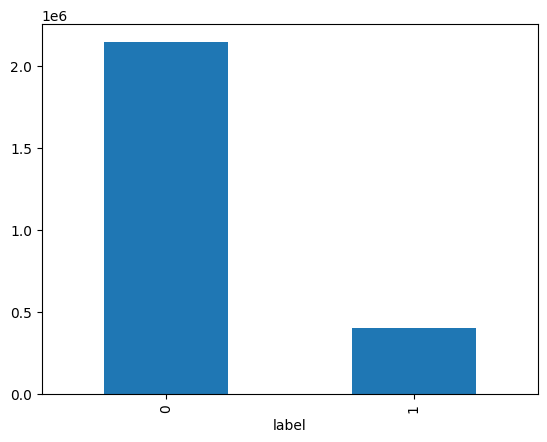

In [7]:
print(df['label'].value_counts())
df['label'].value_counts().plot(kind='bar')

In [ ]:
df2 = df.copy()

## Split dataframe into train and test sets

In [9]:
X = df.drop('label', axis = 1)
y = df['label']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [11]:
print(f'Size of training dataset = {X_train.shape}')
print(f'Size of testing dataset = {X_test.shape}')

Size of training dataset = (1780993, 77)
Size of testing dataset = (763283, 77)


## Training models

In [12]:
# Function to print classification reports and plot confusion matrix and ROC curve
def print_reports(clf, X_test, y_test, y_pred, classes, title):
    print(title)
    # print classification report
    print(classification_report(y_test, y_pred))
    
    print()
    
    # plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
    print()
    
    # plot ROC curve
    roc_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test)

### Stochastic Gradient Descent

In [19]:
sgd_clf = SGDClassifier(max_iter=1000)
sgd_clf.fit(X_train, y_train)
sgd_pred = sgd_clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91    681286
           1       0.62      0.62      0.62    167074

    accuracy                           0.85    848360
   macro avg       0.76      0.76      0.76    848360
weighted avg       0.85      0.85      0.85    848360




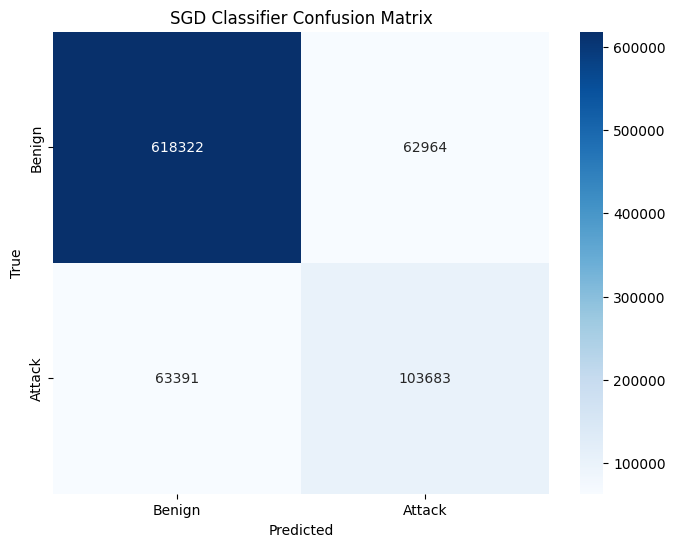

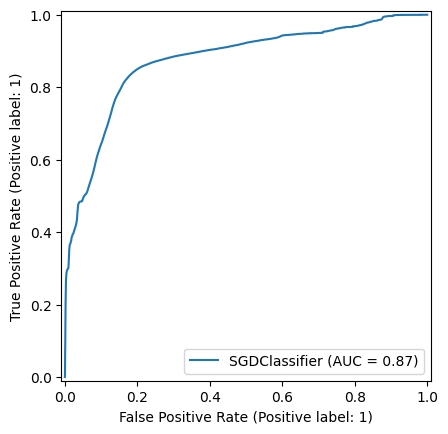

In [20]:
print_reports(sgd_clf, X_test, y_test, sgd_pred, ['Benign', 'Attack'], 'SGD Classifier Confusion Matrix')

In [13]:
sgd_clf = SGDClassifier(max_iter=1000)
sgd_clf.fit(X_train, y_train)
sgd_pred = sgd_clf.predict(X_test)
print_reports(sgd_clf, X_test, y_test, sgd_pred, ['Benign', 'Attack'], 'SGD Classifier Confusion Matrix')

ValueError: Input X contains NaN.
SGDClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

SGD Classifier Confusion Matrix
              precision    recall  f1-score   support

           0       0.91      0.94      0.93    681286
           1       0.72      0.63      0.67    167074

    accuracy                           0.88    848360
   macro avg       0.81      0.79      0.80    848360
weighted avg       0.87      0.88      0.88    848360




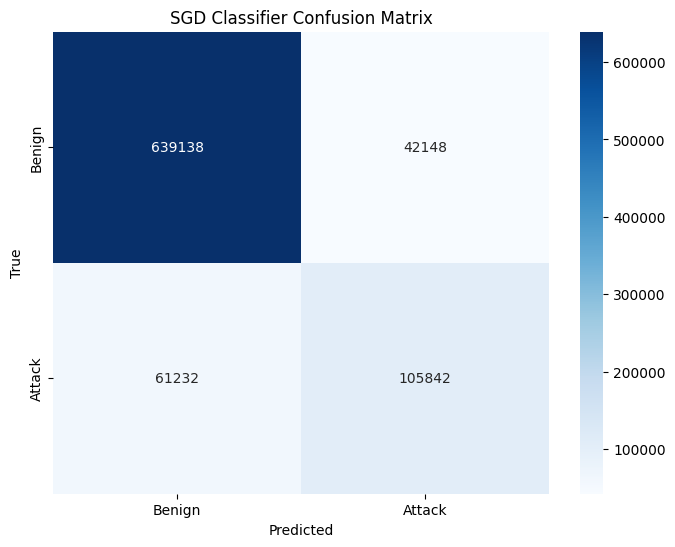

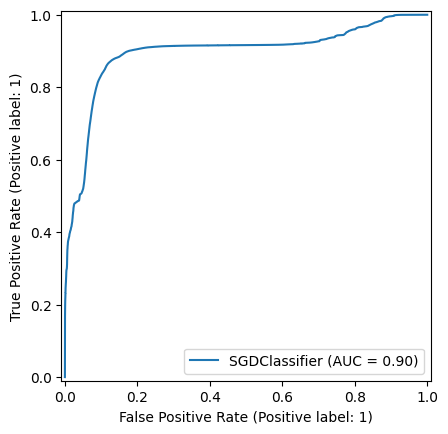

In [13]:
sgd_clf = SGDClassifier(max_iter=1000)
sgd_clf.fit(X_train, y_train)
sgd_pred = sgd_clf.predict(X_test)
print_reports(sgd_clf, X_test, y_test, sgd_pred, ['Benign', 'Attack'], 'SGD Classifier Confusion Matrix')

#### Kernel approximation

In [9]:
rbf = RBFSampler(gamma=1, random_state=42, n_components=66)
X_features = rbf.fit_transform(X_train)
sgd_clf = SGDClassifier(max_iter=1000)
sgd_clf.fit(X_features, y_train)
rbf_pred = sgd_clf.predict(X_test)

/home/c3rb/ml/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(


SGD Classifier Confusion Matrix
              precision    recall  f1-score   support

           0       0.91      0.02      0.03    681286
           1       0.20      0.99      0.33    167074

    accuracy                           0.21    848360
   macro avg       0.55      0.51      0.18    848360
weighted avg       0.77      0.21      0.09    848360




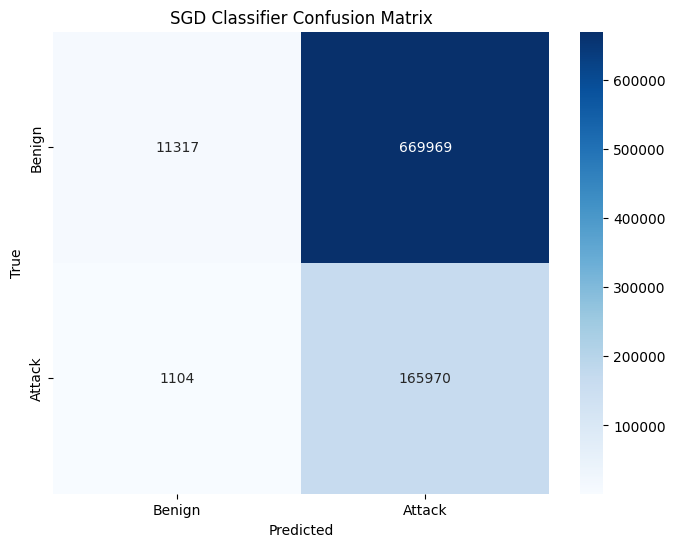

/home/c3rb/ml/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(


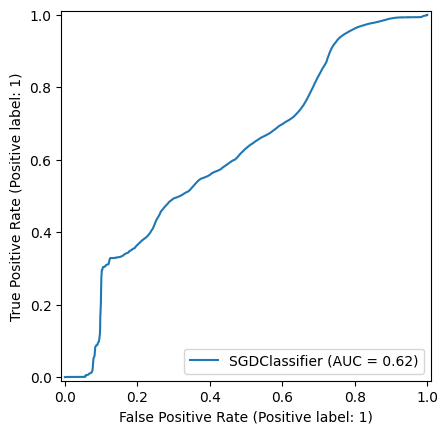

In [10]:
print_reports(sgd_clf, X_test, y_test, rbf_pred, ['Benign', 'Attack'], 'SGD Classifier Confusion Matrix')

#### Balancing data

SGD Classifier with balanced classes Confusion Matrix
              precision    recall  f1-score   support

           0       0.89      0.92      0.91    681286
           1       0.63      0.52      0.57    167074

    accuracy                           0.84    848360
   macro avg       0.76      0.72      0.74    848360
weighted avg       0.84      0.84      0.84    848360




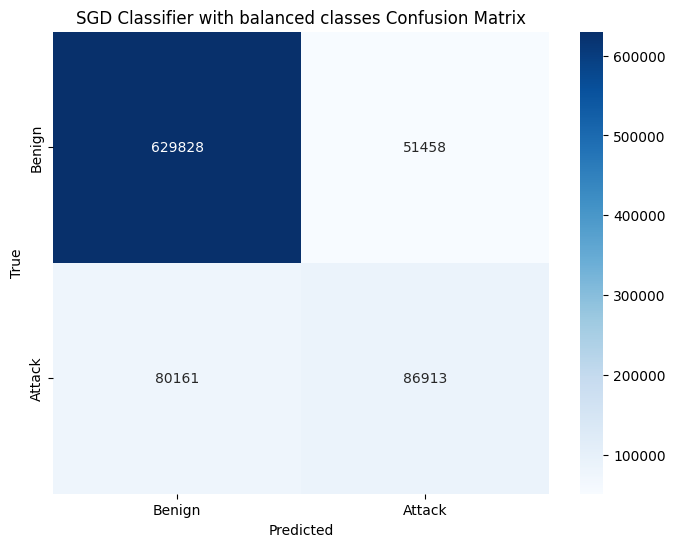

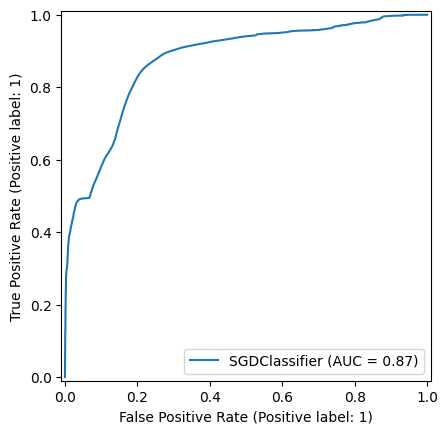

In [9]:
sgd_clf = SGDClassifier(max_iter=1000, class_weight='balanced')
sgd_clf.fit(X_train, y_train)
sgd_pred = sgd_clf.predict(X_test)

print_reports(sgd_clf, X_test, y_test, sgd_pred, ['Benign', 'Attack'], 'SGD Classifier with balanced classes Confusion Matrix')

#### Oversampling (SMOTE)

In [10]:
X.shape, y.shape

((2827864, 66), (2827864,))

In [ ]:
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)
X_smote.shape, y_smote.shape

#### Undersampling (RandomUnderSampler)

In [11]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [12]:
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size = 0.3, random_state = 42)

SGD Classifier Confusion Matrix (w/ RUS)
              precision    recall  f1-score   support

           0       0.81      0.59      0.69    166930
           1       0.68      0.86      0.76    167004

    accuracy                           0.73    333934
   macro avg       0.74      0.73      0.72    333934
weighted avg       0.74      0.73      0.72    333934




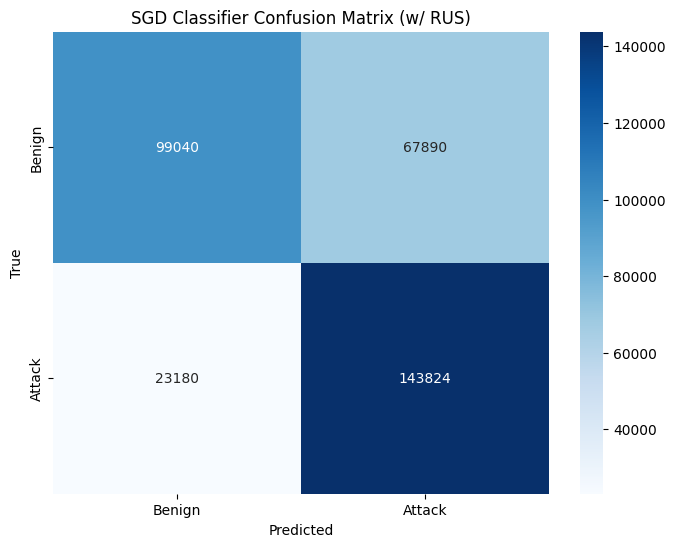

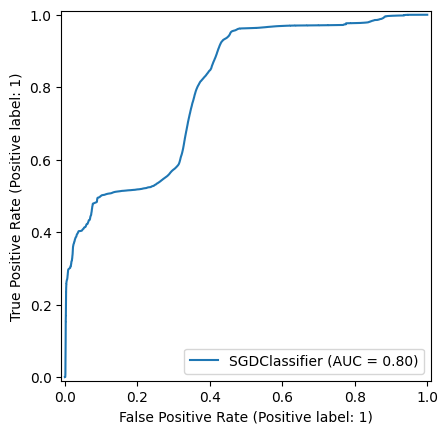

In [13]:
sgd_rus = SGDClassifier(max_iter=500, random_state=42)
sgd_rus.fit(X_train_resampled, y_train_resampled)
rus_pred = sgd_rus.predict(X_test_resampled)
print_reports(sgd_rus, X_test_resampled, y_test_resampled, rus_pred, ['Benign', 'Attack'], 'SGD Classifier Confusion Matrix (w/ RUS)')

### Neural Networks

In [21]:
# mlp_clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=200, random_state=42)
# mlp_clf.fit(X_train, y_train)
# mlp_pred = mlp_clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89    681286
           1       0.00      0.00      0.00    167074

    accuracy                           0.80    848360
   macro avg       0.40      0.50      0.45    848360
weighted avg       0.64      0.80      0.72    848360




/home/c3rb/ml/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/c3rb/ml/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/c3rb/ml/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


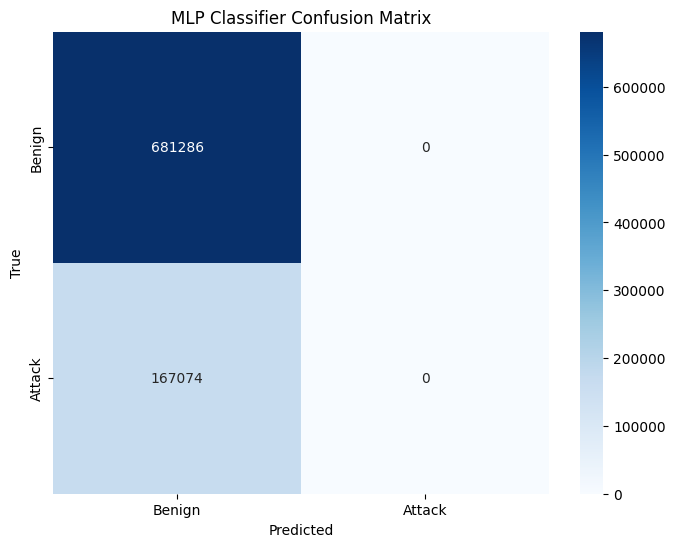

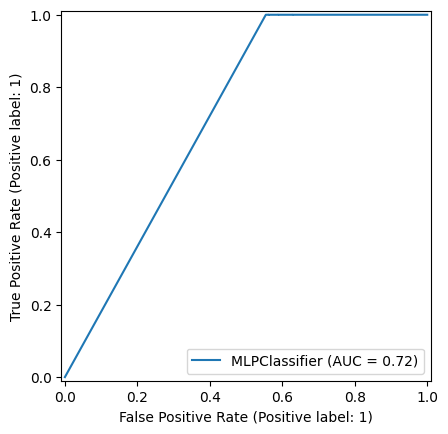

In [22]:
# print_reports(mlp_clf, X_test, y_test, mlp_pred, ['Benign', 'Attack'], 'MLP Classifier Confusion Matrix')

array([[0.000000e+00, 0.000000e+00, 4.918800e+04, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.000000e+00, 1.000000e+00, 4.918800e+04, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [2.000000e+00, 2.000000e+00, 4.918800e+04, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       ...,
       [2.827861e+06, 2.257420e+05, 6.137500e+04, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [2.827862e+06, 2.257430e+05, 6.132300e+04, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [2.827863e+06, 2.257440e+05, 6.132600e+04, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00]], shape=(2827864, 67))

### Isolation Forest

### plt.figure(figsize=(6,4))

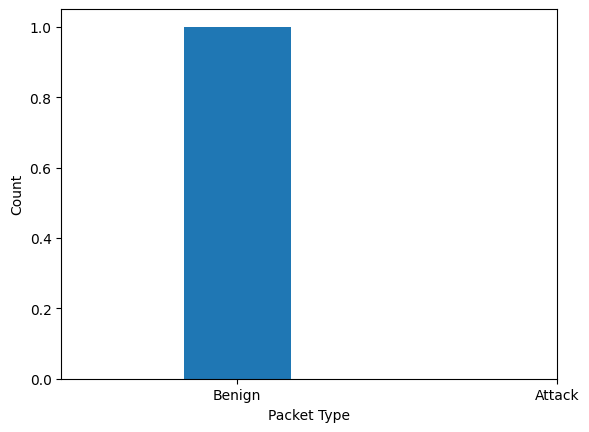

In [32]:
plt.hist(x='label', data=y_train, bins=3)
plt.xticks([0,1], ['Benign', 'Attack'])
plt.xlabel('Packet Type')
plt.ylabel('Count')
plt.show()

In [38]:
y_train_resampled.value_counts()

NameError: name 'y_train_resampled' is not defined